In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
umap_df = pd.read_csv("umap.tsv", sep="\t", index_col=0)
umap_df.head()

,0,1
CW-170-S,-1.592101,2.398290
CW-179-S,-0.511999,3.106120
CW117-S,0.219547,2.900203
CW12S,-0.184609,0.973515
CW140-G,-0.248026,2.169174


In [3]:
metadata_df = pd.read_csv("igsr_samples.tsv", sep="\t", index_col=0)
metadata_df.head()

,Sex,Biosample ID,Population code,Population name,Superpopulation code,Superpopulation name,Population elastic ID,Data collections
Sample name,,,,,,,,
HG00271,male,SAME123417,FIN,Finnish,EUR,European Ancestry,FIN,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
HG00276,female,SAME123424,FIN,Finnish,EUR,European Ancestry,FIN,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
HG00288,female,SAME1839246,FIN,Finnish,EUR,European Ancestry,FIN,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
HG00290,male,SAME1839057,FIN,Finnish,EUR,European Ancestry,FIN,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
HG00303,male,SAME1840115,FIN,Finnish,EUR,European Ancestry,FIN,1000 Genomes on GRCh38


In [4]:
cols = ["Population code", "Superpopulation code"]
umap_df = pd.merge(umap_df, metadata_df[cols], left_index=True, right_index=True, how="left")
umap_df.head()

,0,1,Population code,Superpopulation code
CW-170-S,-1.592101,2.398290,NaN,NaN
CW-179-S,-0.511999,3.106120,NaN,NaN
CW117-S,0.219547,2.900203,NaN,NaN
CW12S,-0.184609,0.973515,NaN,NaN
CW140-G,-0.248026,2.169174,NaN,NaN


In [5]:
kg_samples_umap = umap_df[~umap_df["Population code"].isna()]
kg_samples_umap.head()

,0,1,Population code,Superpopulation code
HG00096,-1.006470,1.085707,GBR,EUR
HG00097,-1.235909,1.444267,GBR,EUR
HG00099,-1.100503,1.377316,GBR,EUR
HG00100,-1.179683,0.675839,GBR,EUR
HG00101,-1.145112,0.864627,GBR,EUR


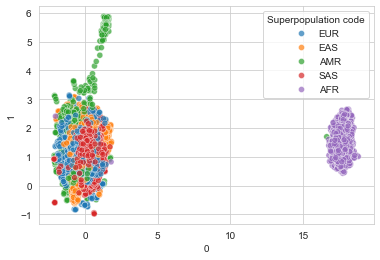

In [12]:
sns.scatterplot(kg_samples_umap, x="0", y="1", hue="Superpopulation code", alpha=0.7)
plt.show()

In [14]:
kg_samples_umap[(kg_samples_umap["0"] > 5) & (kg_samples_umap["Superpopulation code"] != "AFR")]

,0,1,Population code,Superpopulation code
HG01108,16.625559,1.697103,PUR,AMR
HG01241,17.456835,1.650385,PUR,AMR


In [15]:
kg_samples_umap[(kg_samples_umap["0"] < 5) & (kg_samples_umap["Superpopulation code"] == "AFR")]

,0,1,Population code,Superpopulation code
HG01880,0.173537,-0.283710,ACB,AFR
HG02420,1.794462,0.821987,ACB,AFR
NA19625,0.084658,1.877258,ASW,AFR
NA19921,-2.025385,2.410783,ASW,AFR
NA20274,-0.099656,1.577530,ASW,AFR
NA20299,-0.229377,1.491473,ASW,AFR
NA20314,-0.519569,1.112183,ASW,AFR
